In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras import metrics
from keras.regularizers import l2
import models.nnmodels as nn
import utils.data as data

import gc
gc.enable()
seed = 0
np.random.seed(seed)
%matplotlib inline

Using TensorFlow backend.


In [2]:
print 'Loading DEAP dataset...'
subject_data_folds, valence_folds, arousal_folds = data.load_deap(32, 2)
print 'DEAP dataset is loaded.\n'

print 5*'#' + ' Dataset representation for each subject ' + 5*'#'
print '\nThere are {} subjects in the dataset.\n'.format(len(subject_data_folds))
print '(Trail/Video, Channel, Readings) : ', subject_data_folds[0].shape
print '(Trail/Video, label (valence or arousal)) : ', arousal_folds[0].shape



Loading DEAP dataset...
DEAP dataset is loaded.

##### Dataset representation for each subject #####

There are 32 subjects in the dataset.

(Trail/Video, Channel, Readings) :  (40, 40, 8064)
(Trail/Video, label (valence or arousal)) :  (40, 2)


In [3]:
# Reduce the features dimension
print 'Mapping features into Gaussian with mean zero and unit variance...'
reduced_data_folds = data.normalize_features(subject_data_folds, flag=True)
print 'Normalization done.'

Mapping features into Gaussian with mean zero and unit variance...
Normalization done.


In [4]:
 def Cnn1D(num_classes):
 
 
     model = Sequential()
 
     model.add(Conv1D(filters=16, kernel_size=7, strides=2, batch_input_shape=(None, 4040, 1),\
                         kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
    
 
     model.add(Activation('relu'))
 
 
     model.add(Conv1D(filters=32, kernel_size=7, strides=2, kernel_initializer='he_normal',\
                     kernel_regularizer=l2(0.01)))
 
     model.add(Activation('relu'))
 
 
     model.add(Conv1D(filters=64, kernel_size=7, strides=2, kernel_initializer='he_normal',\
                     kernel_regularizer=l2(0.01)))
 
     model.add(Activation('relu'))
 
     model.add(AveragePooling1D(pool_size=7))
 
     model.add(Flatten())
 
     model.add(Dense(1024, activation='relu',\
                     kernel_regularizer=l2(0.01)))
 
     model.add(Dropout(0.5))
 
     model.add(Dense(512, activation='relu',\
                     kernel_regularizer=l2(0.01)))
 
     model.add(Dropout(0.5))
 
     model.add(Dense(128, activation='relu',\
                     kernel_regularizer=l2(0.01)))
 
     model.add(Dropout(0.5))
 
     model.add(Dense(num_classes, activation='softmax'))
 
     adam = Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
 
     model.compile(optimizer=adam, loss='categorical_crossentropy',\
             metrics=['categorical_accuracy'])
     print model.summary()
 
 
     return model


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2017, 16)          128       
_________________________________________________________________
activation_1 (Activation)    (None, 2017, 16)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1006, 32)          3616      
_________________________________________________________________
activation_2 (Activation)    (None, 1006, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 500, 64)           14400     
_________________________________________________________________
activation_3 (Activation)    (None, 500, 64)           0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 71, 64)            0         
__________

Epoch 35/250
1240/1240 [==============================] - 0s 230us/step - loss: 4.8402 - categorical_accuracy: 0.7694 - val_loss: 4.9597 - val_categorical_accuracy: 0.6500
Epoch 36/250
1240/1240 [==============================] - 0s 229us/step - loss: 4.6622 - categorical_accuracy: 0.7742 - val_loss: 4.7489 - val_categorical_accuracy: 0.6750
Epoch 37/250
1240/1240 [==============================] - 0s 228us/step - loss: 4.5018 - categorical_accuracy: 0.7758 - val_loss: 4.5987 - val_categorical_accuracy: 0.6750
Epoch 38/250
1240/1240 [==============================] - 0s 229us/step - loss: 4.3432 - categorical_accuracy: 0.7871 - val_loss: 4.4602 - val_categorical_accuracy: 0.6500
Epoch 39/250
1240/1240 [==============================] - 0s 230us/step - loss: 4.1957 - categorical_accuracy: 0.7742 - val_loss: 4.3952 - val_categorical_accuracy: 0.6750
Epoch 40/250
1240/1240 [==============================] - 0s 227us/step - loss: 4.0330 - categorical_accuracy: 0.8016 - val_loss: 4.2824 - v

1240/1240 [==============================] - 0s 230us/step - loss: 1.5271 - categorical_accuracy: 0.9242 - val_loss: 2.3658 - val_categorical_accuracy: 0.5250
Epoch 82/250
1240/1240 [==============================] - 0s 230us/step - loss: 1.4906 - categorical_accuracy: 0.9355 - val_loss: 2.1421 - val_categorical_accuracy: 0.6000
Epoch 83/250
1240/1240 [==============================] - 0s 232us/step - loss: 1.4771 - categorical_accuracy: 0.9282 - val_loss: 2.0914 - val_categorical_accuracy: 0.6000
Epoch 84/250
1240/1240 [==============================] - 0s 230us/step - loss: 1.4540 - categorical_accuracy: 0.9210 - val_loss: 2.2959 - val_categorical_accuracy: 0.5250
Epoch 85/250
1240/1240 [==============================] - 0s 230us/step - loss: 1.4091 - categorical_accuracy: 0.9500 - val_loss: 2.4035 - val_categorical_accuracy: 0.5000
Epoch 86/250
1240/1240 [==============================] - 0s 230us/step - loss: 1.3826 - categorical_accuracy: 0.9492 - val_loss: 2.3121 - val_categorica

Epoch 128/250
1240/1240 [==============================] - 0s 229us/step - loss: 0.8831 - categorical_accuracy: 0.9887 - val_loss: 2.0933 - val_categorical_accuracy: 0.5000
Epoch 129/250
1240/1240 [==============================] - 0s 232us/step - loss: 0.8726 - categorical_accuracy: 0.9919 - val_loss: 2.2475 - val_categorical_accuracy: 0.5000
Epoch 130/250
1240/1240 [==============================] - 0s 232us/step - loss: 0.8629 - categorical_accuracy: 0.9935 - val_loss: 2.2203 - val_categorical_accuracy: 0.5000
Epoch 131/250
1240/1240 [==============================] - 0s 230us/step - loss: 0.8599 - categorical_accuracy: 0.9911 - val_loss: 2.2134 - val_categorical_accuracy: 0.5000
Epoch 132/250
1240/1240 [==============================] - 0s 229us/step - loss: 0.8544 - categorical_accuracy: 0.9911 - val_loss: 2.0617 - val_categorical_accuracy: 0.5250
Epoch 133/250
1240/1240 [==============================] - 0s 230us/step - loss: 0.8437 - categorical_accuracy: 0.9935 - val_loss: 2.00

1240/1240 [==============================] - 0s 231us/step - loss: 0.7036 - categorical_accuracy: 0.9903 - val_loss: 1.7981 - val_categorical_accuracy: 0.5500
Epoch 175/250
1240/1240 [==============================] - 0s 231us/step - loss: 0.7034 - categorical_accuracy: 0.9847 - val_loss: 1.7505 - val_categorical_accuracy: 0.5500
Epoch 176/250
1240/1240 [==============================] - 0s 231us/step - loss: 0.6889 - categorical_accuracy: 0.9903 - val_loss: 1.8758 - val_categorical_accuracy: 0.5500
Epoch 177/250
1240/1240 [==============================] - 0s 229us/step - loss: 0.6987 - categorical_accuracy: 0.9831 - val_loss: 1.7519 - val_categorical_accuracy: 0.5250
Epoch 178/250
1240/1240 [==============================] - 0s 231us/step - loss: 0.7065 - categorical_accuracy: 0.9847 - val_loss: 1.6688 - val_categorical_accuracy: 0.5250
Epoch 179/250
1240/1240 [==============================] - 0s 233us/step - loss: 0.7389 - categorical_accuracy: 0.9613 - val_loss: 1.6102 - val_categ

1240/1240 [==============================] - 0s 232us/step - loss: 0.6170 - categorical_accuracy: 0.9839 - val_loss: 2.0379 - val_categorical_accuracy: 0.4500
Epoch 221/250
1240/1240 [==============================] - 0s 232us/step - loss: 0.6233 - categorical_accuracy: 0.9750 - val_loss: 2.1113 - val_categorical_accuracy: 0.4500
Epoch 222/250
1240/1240 [==============================] - 0s 233us/step - loss: 0.6074 - categorical_accuracy: 0.9863 - val_loss: 1.7986 - val_categorical_accuracy: 0.5250
Epoch 223/250
1240/1240 [==============================] - 0s 231us/step - loss: 0.5911 - categorical_accuracy: 0.9927 - val_loss: 1.6956 - val_categorical_accuracy: 0.5500
Epoch 224/250
1240/1240 [==============================] - 0s 234us/step - loss: 0.5880 - categorical_accuracy: 0.9960 - val_loss: 1.7128 - val_categorical_accuracy: 0.5500
Epoch 225/250
1240/1240 [==============================] - 0s 234us/step - loss: 0.5814 - categorical_accuracy: 0.9960 - val_loss: 1.6713 - val_categ

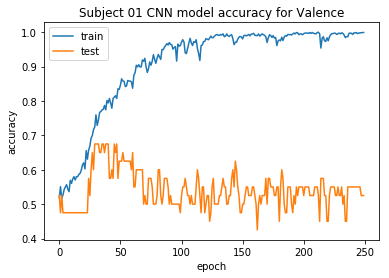

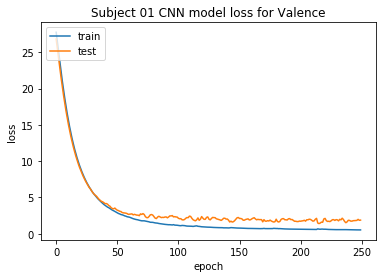

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 2017, 16)          128       
_________________________________________________________________
activation_4 (Activation)    (None, 2017, 16)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1006, 32)          3616      
_________________________________________________________________
activation_5 (Activation)    (None, 1006, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 500, 64)           14400     
_________________________________________________________________
activation_6 (Activation)    (None, 500, 64)           0         
_________________________________________________________________
average_pooling1d_2 (Average (None, 71, 64)            0         
__________

KeyboardInterrupt: 

In [5]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
 
from keras.utils import normalize, print_summary, plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, RMSprop, Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,\
            Dropout, Flatten, merge, Reshape, Activation, Conv1D, AveragePooling1D



num_subjects = 32
batch_size = 310
epochs = 250
num_exp = 40


accuracies = []

num_subjects = 32

for s in np.arange(0, num_subjects):
    
    
    X_val = reduced_data_folds[s]
    X_val = np.expand_dims(X_val, axis=2)
    y_val = valence_folds[s]
    
    X_remaining_folds = reduced_data_folds[:s] + reduced_data_folds[s+1:]
    y_remaining_folds = valence_folds[:s] + valence_folds[s+1:]
    
    X_train = np.concatenate(X_remaining_folds)
    X_train = np.expand_dims(X_train, axis=2)
    y_train = np.concatenate(y_remaining_folds)

    model = Cnn1D(num_classes=2)


    key = 's'+str(s+1).zfill(2)+'_valence(3classes)'
    
    

    
    
# checkpoint
    filepath="../saved_models/best_Cnn1D_model_for_{}.h5".format(key)

    checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy',
                                verbose=1, save_best_only=True, mode='max', period=50)
    callbacks_list = [checkpoint]
    
    hist = model.fit(X_train, y_train, 
             batch_size=batch_size,
             epochs=epochs,
             shuffle=True,
             verbose=1,
             validation_data=(X_val, y_val), callbacks=callbacks_list)

    model.load_weights(filepath)
    
    scores = model.evaluate(x=X_val, y=y_val)


    accuracies.append(scores[1])
    # summarize history for accuracy
    plt.plot(hist.history['categorical_accuracy'])
    plt.plot(hist.history['val_categorical_accuracy'])
    plt.title('Subject ' +str(s+1).zfill(2)+ ' CNN model accuracy for Valence')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Subject ' +str(s+1).zfill(2)+ ' CNN model loss for Valence')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()